In [12]:
#1
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
#2
df = pd.read_csv('./heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [14]:
#3
# Hiển thị cách đánh inddeexx của dữ liệu

df.index

RangeIndex(start=0, stop=303, step=1)

In [15]:
# Danh sách các cột imput
columns_eda = df.columns[:-1]
columns_eda

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

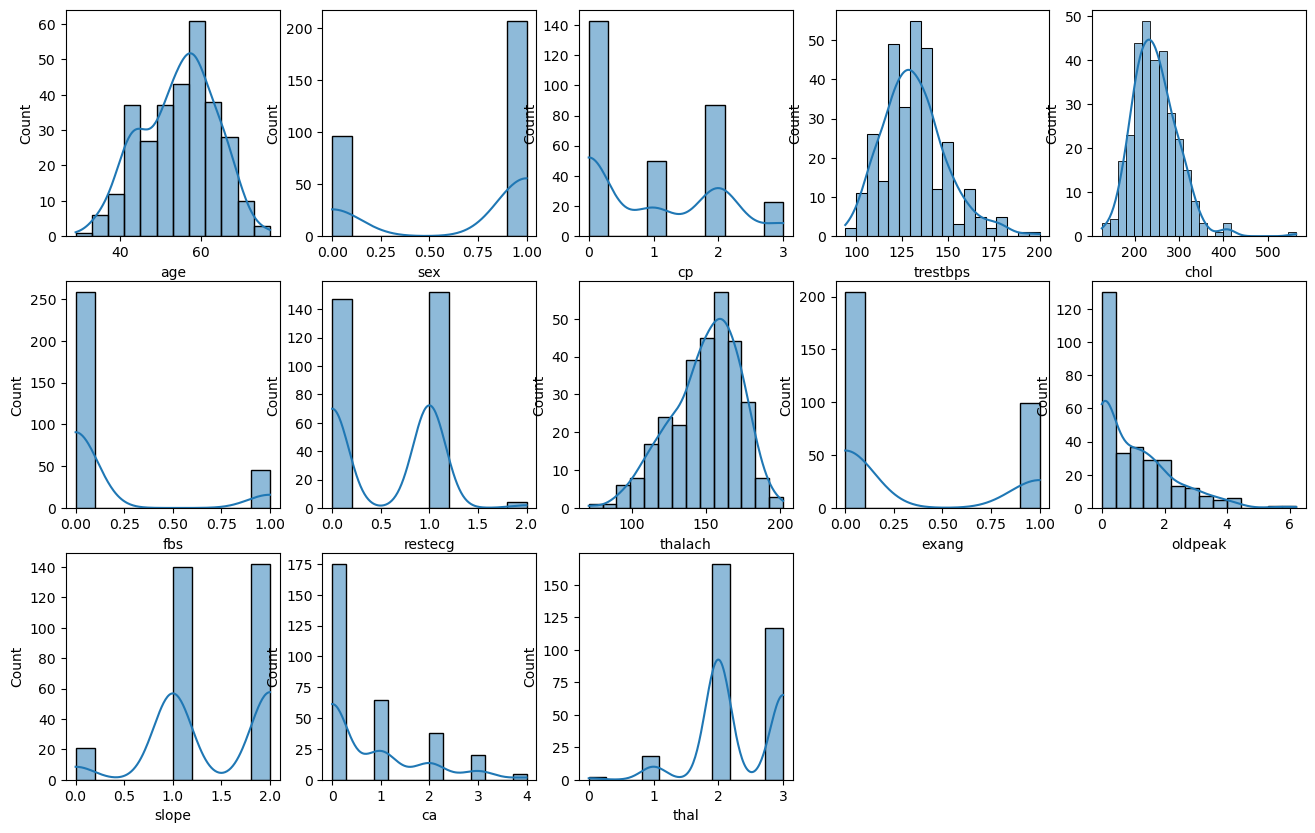

In [16]:
# Phân tích các biến số input
fig = plt.figure(figsize=(16,10))
for i in range(len(columns_eda)):
    colname = columns_eda[i]
    sub = fig.add_subplot(3,5, i+1)
    sns.histplot(data=df, x=colname, kde=True)

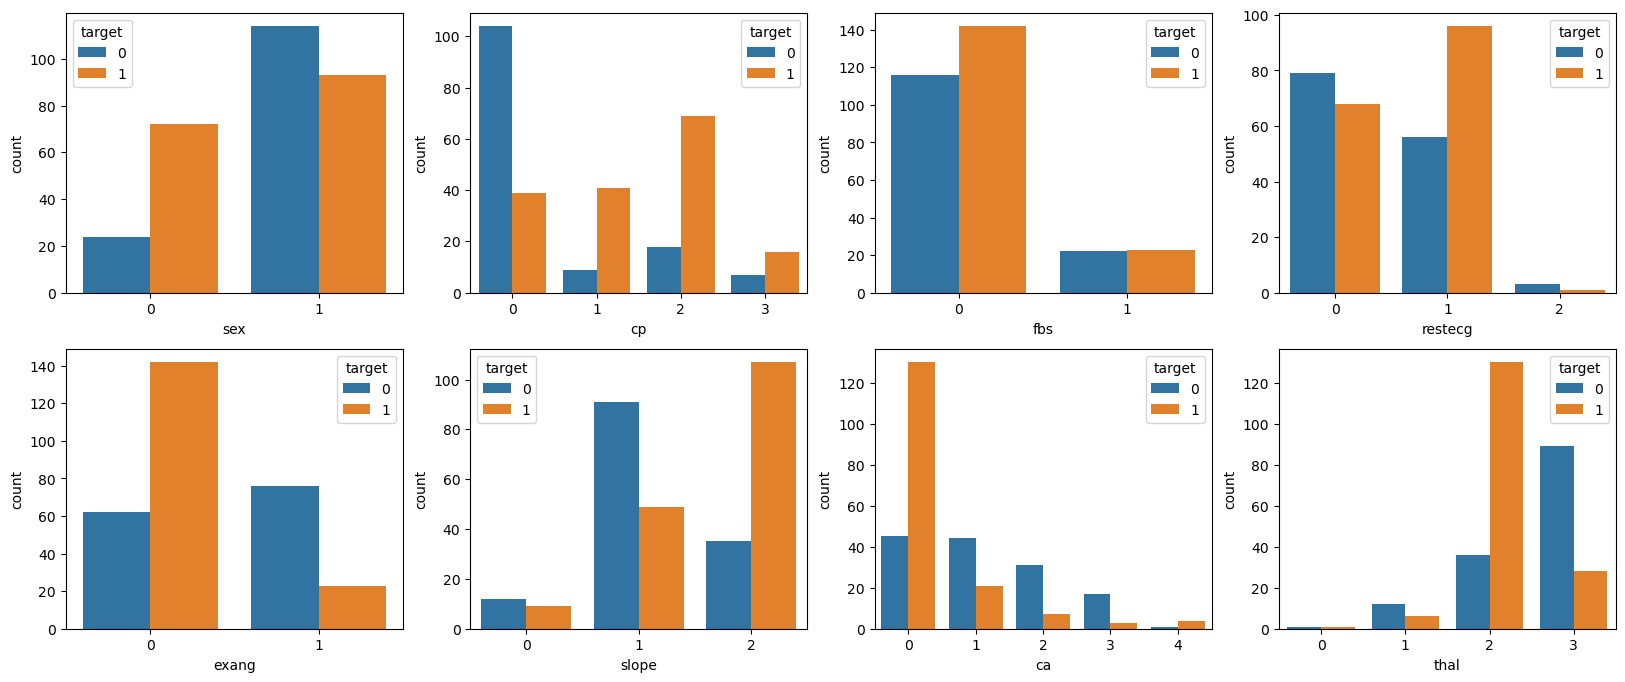

In [17]:
# đếm xem số lượng các biến input (nhóm định tính) theo biến mục tiêu
categories_list = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
fig = plt.figure(figsize=(20,8))

for i in range(len(categories_list)):
    colname = categories_list[i]
    sub = fig.add_subplot(2,4,i+1)
    sns.countplot(data=df, x=colname, hue='target')

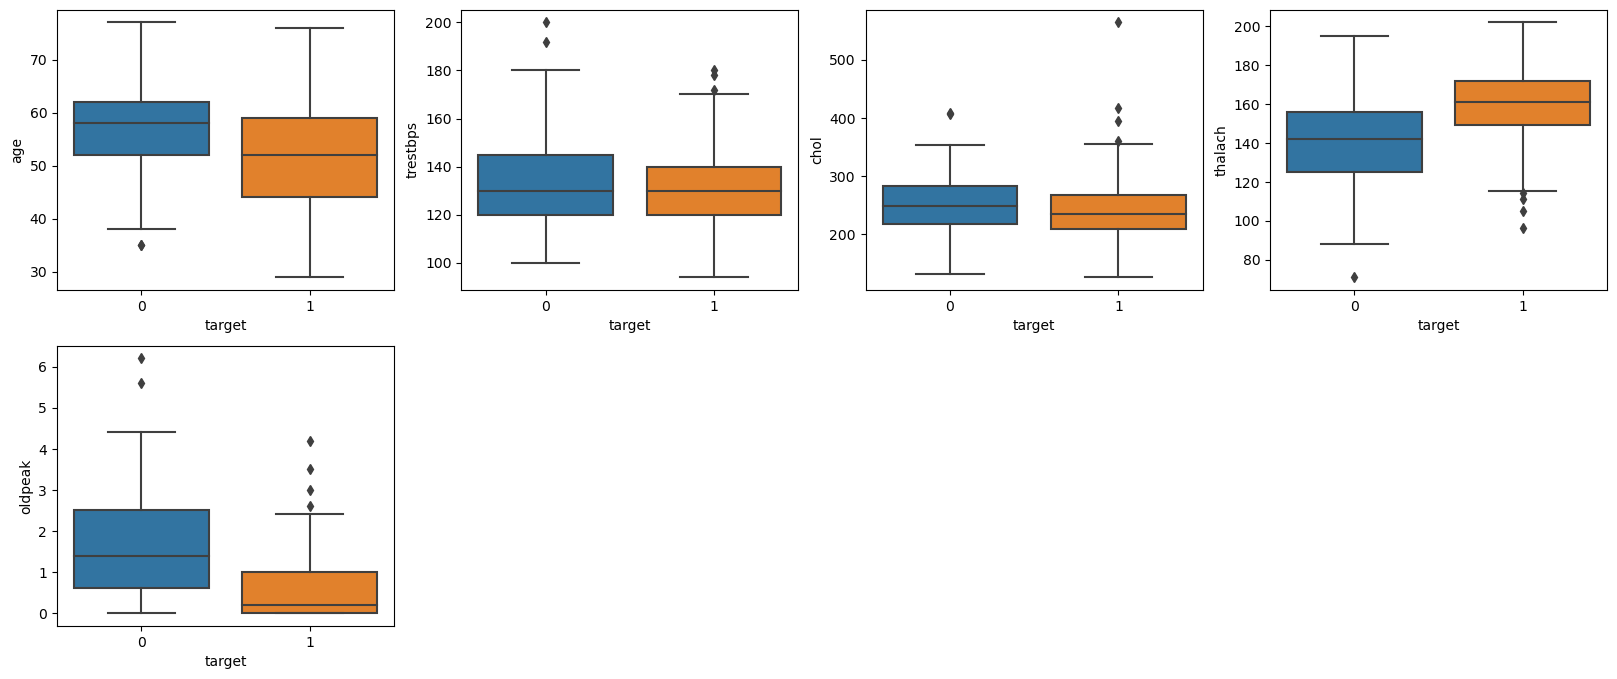

In [18]:
# Phana tichs bieuer dodof Box-plot các biến input (nhóm định lượng) theo biến mục tiêu

numerical_list = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
fig = plt.figure(figsize=(20,8))

for i in range(len(numerical_list)):
    colname = numerical_list[i]
    sub = fig.add_subplot(2, 4, i+1)
    sns.boxplot(data=df, x='target', y=colname)

In [19]:
# 4 Xây dựng mô hình
#a. Chuẩn bị dữ liệu
X = df.iloc[:, :-1].values
y = df[['target']].values
X = X.astype(float)
y = y.astype(float)


In [20]:
#b. Phân chia tập dữ liệu thành hai phần train và test tỉ lệ 80:20  và hệ số random là 42

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
#c. Hiển thị danh sách index của các sample trong tập X_train, X_test
print('Train index:', np.arange(X_train.shape[0]).tolist())
print('Test index:', np.arange(X_test.shape[0]).tolist())

Train index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 2

In [22]:
#d. Huấn luyện mô hình 

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8, algorithm="ball_tree")
knn.fit(X_train, y_train)



c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(algorithm='ball_tree', n_neighbors=8)

In [23]:
#e. Đánh giá mô hình trên tập test bằng độ đo accuracy
knn.score(X_test, y_test)

0.6885245901639344

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

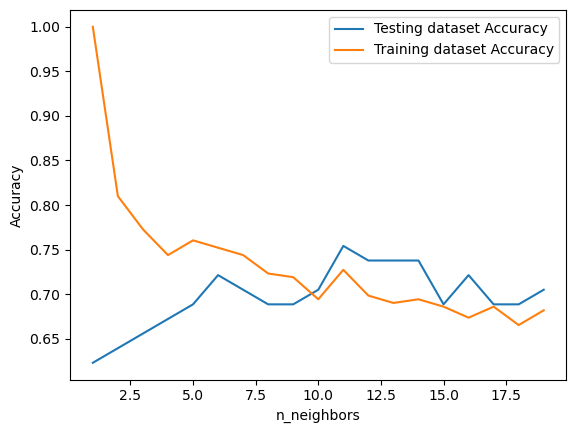

In [24]:
#f. Sử dụng độ đo đánh giá accuracy trên tập train và test để so sánh và chọn lựa K bao 
# nhiêu là tốt nhất cho mô hình K-NN. Sinh viên nhìn biểu đồ để trả lời
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Define a range for neighbors
neighbors = np.arange(1, 20)

# Prepare arrays to store accuracy values
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.plot(neighbors, test_accuracy, label='Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label='Training dataset Accuracy')

# Add labels and legend
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')

# Show plot
plt.show()


In [25]:
# Training dataset Accuracy (đường màu cam): Ở các giá trị K nhỏ (ví dụ K = 1), độ chính xác của tập train rất cao, gần như đạt 1.0. Tuy nhiên, khi K tăng lên, độ chính xác trên tập train giảm dần và ổn định ở mức khoảng 0.7 - 0.75.
# Testing dataset Accuracy (đường màu xanh): Độ chính xác trên tập test có xu hướng tăng dần khi K tăng từ 1 đến khoảng 7 hoặc 8, sau đó dao động và có vẻ như không còn cải thiện đáng kể ở các giá trị K lớn hơn. Độ chính xác đạt đỉnh cao nhất tại khoảng K = 7 - 8 (khoảng 0.75).
# Nhận xét:
# K quá nhỏ (K = 1 - 3): Khi K nhỏ, mô hình có độ chính xác rất cao trên tập train nhưng lại thấp trên tập test, đây là dấu hiệu của overfitting.
# K lớn hơn (K > 10): Khi K tăng quá cao, độ chính xác trên tập train và test có xu hướng giảm, đây là dấu hiệu của underfitting.
# ===> Kết luận: Giá trị K tốt nhất cho mô hình K-NN có thể là K = 7 hoặc K = 8, vì tại điểm này, độ chính xác trên tập test đạt cao nhất và không có sự chênh lệch quá lớn giữa tập train và test.

In [26]:
# 5. Xây dựng lại mô hình với K là tốt nhất dựa trên câu 4f.
# Chọn k =7
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Xây dựng mô hình với K tốt nhất
knn_best = KNeighborsClassifier(n_neighbors=7)
knn_best.fit(X_train, y_train)

# Dự đoán trên tập train và test
y_train_pred = knn_best.predict(X_train)
y_test_pred = knn_best.predict(X_test)

# Tính toán độ chính xác trên tập train và test
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Hiển thị kết quả
print(f"Accuracy on training set: {train_accuracy:.4f}")
print(f"Accuracy on test set: {test_accuracy:.4f}")


Accuracy on training set: 0.7438
Accuracy on test set: 0.7049


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [28]:
# 6. In ra danh sách khoảng cách và các hàng xóm từ các mẫu dữ liệu trong tập test từ mô hình  ở câu 5
distances, indices = knn.kneighbors(X_test)
for i, (distance, neighbor) in enumerate(zip(distances, neighbors)):
    print(f"Test sample {i+1}:")
    print(f"Distances to neighbors: {distance}")
    print(f"Indices of neighbors: {neighbor}")
    print("-" * 50)

Test sample 1:
Distances to neighbors: [ 6.63626401 17.93906352 18.22882333 23.23122898 24.27673784 27.23894271
 28.29416901 28.8159678  31.74649587 32.21241996 32.83230117 33.29804799
 33.9316961  34.9450998  35.84633873 36.37526632 38.00052631 38.12033578
 39.05176052]
Indices of neighbors: 1
--------------------------------------------------
Test sample 2:
Distances to neighbors: [20.96759404 21.51650529 26.15415837 27.35616932 27.89336839 28.93095228
 31.43580761 32.57299495 34.21461676 35.98555266 36.39725264 36.40659281
 36.57266739 38.45828909 39.15405471 40.41088962 40.73929307 41.24366618
 42.49752934]
Indices of neighbors: 2
--------------------------------------------------
Test sample 3:
Distances to neighbors: [46.55276576 46.92589903 53.2169146  54.00962877 54.00962877 54.46503466
 61.48788499 61.61980201 61.91413409 62.66450351 62.98761783 63.04791828
 63.82037292 64.83856877 66.9623775  68.26448564 68.52036194 68.7054583
 69.41728891]
Indices of neighbors: 3
-----------

In [30]:
# 7. Cho biết sample input đầu tiên trong tập test sẽ lần lượt gần K (hàng xóm) dòng nào trong tập train tính theo index và khoảng cách tương đương theo độ đo Euclidean là bao nhiêu?
# Lấy ra danh sách khoảng cách và hàng xóm của mẫu đầu tiên trong tập test
distances, neighbors = knn_best.kneighbors([X_test[0]])
# danh sách khoảng cách và các neighbors của sample đầu tiên
print(f"Sample đầu tiên trong tập test:")
print(f"Các khoảng cách (Euclidean) đến hàng xóm: {distances[0]}")
print(f"Chỉ số (index) các hàng xóm trong tập train: {neighbors[0]}")

Sample đầu tiên trong tập test:
Các khoảng cách (Euclidean) đến hàng xóm: [ 6.63626401 17.93906352 18.22882333 23.23122898 24.27673784 27.23894271
 28.29416901]
Chỉ số (index) các hàng xóm trong tập train: [  1  79 161 222 211  25 217]


In [ ]:
#8
# Cho biết với một sample input tương ứng ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
# 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'] = [47,0,0,150,250,0,1,140,1,0.5,1,0,2] thì sẽ
# gần K hàng xóm nào trong tập huấn luyện, với tương ứng lần lượt khoảng cách là bao nhiêu và cho biết giá trị Age của hàng xóm gần nhất

In [31]:
# 
sample_input = np.array([[47, 0, 0, 150, 250, 0, 1, 140, 1, 0.5, 1, 0, 2]])
# 
distances, neighbors = knn_best.kneighbors(sample_input)
# 
print(f"Các khoảng cách (Euclidean) đến hàng xóm: {distances[0]}")
print(f"Chỉ số (index) các hàng xóm trong tập train: {neighbors[0]}")
# gần nhất
nearest_neighbor_index = neighbors[0][0] 
# Giả sử 'Age' là cột đầu tiên trong X_train
nearest_neighbor_age = X_train[nearest_neighbor_index][0]  
print(f"Giá trị Age của hàng xóm gần nhất: {nearest_neighbor_age}")


Các khoảng cách (Euclidean) đến hàng xóm: [16.1322658  20.65453945 21.38340478 21.39649504 22.11537926 23.02194605
 23.09567059]
Chỉ số (index) các hàng xóm trong tập train: [168   2 180  11  94  62 172]
Giá trị Age của hàng xóm gần nhất: 61.0


In [32]:
#9
# Xem danh sách các giá trị của lớp đánh nhãn của biến output (target) nhằm xác định bệnh  nhân có bệnh hay không

unique_labels = np.unique(y_train)
print(f"Các giá trị của lớp đánh nhãn trong biến output: {unique_labels}")


Các giá trị của lớp đánh nhãn trong biến output: [0. 1.]


In [33]:
# 10. Xem danh sách xác suất tiền dự báo của các mẫu dữ liệu tập test theo các nhãn đầu ra
y_test_proba = knn_best.predict_proba(X_test)

for i, proba in enumerate(y_test_proba):
    print(f"Mẫu {i+1}: Xác suất tiên đoán theo các nhãn {proba}")


Mẫu 1: Xác suất tiên đoán theo các nhãn [1. 0.]
Mẫu 2: Xác suất tiên đoán theo các nhãn [0.14285714 0.85714286]
Mẫu 3: Xác suất tiên đoán theo các nhãn [0.28571429 0.71428571]
Mẫu 4: Xác suất tiên đoán theo các nhãn [0.28571429 0.71428571]
Mẫu 5: Xác suất tiên đoán theo các nhãn [0.57142857 0.42857143]
Mẫu 6: Xác suất tiên đoán theo các nhãn [0.28571429 0.71428571]
Mẫu 7: Xác suất tiên đoán theo các nhãn [0.14285714 0.85714286]
Mẫu 8: Xác suất tiên đoán theo các nhãn [0.85714286 0.14285714]
Mẫu 9: Xác suất tiên đoán theo các nhãn [0.85714286 0.14285714]
Mẫu 10: Xác suất tiên đoán theo các nhãn [0.28571429 0.71428571]
Mẫu 11: Xác suất tiên đoán theo các nhãn [0.71428571 0.28571429]
Mẫu 12: Xác suất tiên đoán theo các nhãn [0.42857143 0.57142857]
Mẫu 13: Xác suất tiên đoán theo các nhãn [0.14285714 0.85714286]
Mẫu 14: Xác suất tiên đoán theo các nhãn [0.57142857 0.42857143]
Mẫu 15: Xác suất tiên đoán theo các nhãn [0.14285714 0.85714286]
Mẫu 16: Xác suất tiên đoán theo các nhãn [0.142857

In [34]:
# 11. Cho biết mẫu input thứ hai trong tập test khi qua mô hình dự báo sẽ cho xác xuất dự báo nhãn nào cao hơn và giá trị là bao nhiêu, còn nhãn thấp là nhãn nào có xác suất bao nhiêu

sample_2_proba = knn_best.predict_proba([X_test[1]])

# Xác suất nhãn 0
proba_0 = sample_2_proba[0][0]  
# Xác suất nhãn 1
proba_1 = sample_2_proba[0][1]  

if proba_0 > proba_1:
    print(f"Nhãn dự báo cao hơn là nhãn 0 với xác suất {proba_0:.4f}")
    print(f"Nhãn thấp hơn là nhãn 1 với xác suất {proba_1:.4f}")
else:
    print(f"Nhãn dự báo cao hơn là nhãn 1 với xác suất {proba_1:.4f}")
    print(f"Nhãn thấp hơn là nhãn 0 với xác suất {proba_0:.4f}")


Nhãn dự báo cao hơn là nhãn 1 với xác suất 0.8571
Nhãn thấp hơn là nhãn 0 với xác suất 0.1429


In [35]:
#12.
# Liệt kê danh sách các nhãn dự báo thông qua mô hình của các mẫu dữ liệu input trong tập 
# test. Hãy cho biết kết quả dự báo của mẫu input thứ 5 trong tập test sẽ được dự báo là bao nhiêu?

y_test_predicted = knn_best.predict(X_test)
y_test_predicted

array([0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 0., 0., 1., 0., 1., 0.])

In [37]:
#13
# Hãy cho biết nếu điều chỉnh ngưỡng xác suất (threshold) đưa ra quyết định là 0.65 thì kết quả dự báo của mẫu input số hai và mẫu số năm và mẫu số sáu là bao nhiêu
# Lấy xác suất dự báo cho các mẫu input thứ 2, 5 và 6
proba_sample_2 = knn_best.predict_proba([X_test[1]])[0]
proba_sample_5 = knn_best.predict_proba([X_test[4]])[0]
proba_sample_6 = knn_best.predict_proba([X_test[5]])[0]

# Định nghĩa hàm để dự báo với ngưỡng xác suất 0.65
def custom_predict(proba, threshold=0.65):
    if proba[1] >= threshold:
        return 1
    else:
        return 0

# Dự báo cho từng mẫu với ngưỡng 0.65
pred_sample_2 = custom_predict(proba_sample_2, threshold=0.65)
pred_sample_5 = custom_predict(proba_sample_5, threshold=0.65)
pred_sample_6 = custom_predict(proba_sample_6, threshold=0.65)

# In kết quả dự báo
print(f"Kết quả dự báo của mẫu input số 2 với ngưỡng 0.65: {pred_sample_2}")
print(f"Kết quả dự báo của mẫu input số 5 với ngưỡng 0.65: {pred_sample_5}")
print(f"Kết quả dự báo của mẫu input số 6 với ngưỡng 0.65: {pred_sample_6}")



Kết quả dự báo của mẫu input số 2 với ngưỡng 0.65: 1
Kết quả dự báo của mẫu input số 5 với ngưỡng 0.65: 0
Kết quả dự báo của mẫu input số 6 với ngưỡng 0.65: 1


In [36]:
#14. Hãy đánh giá mô hình trên tập test qua Confussion – Matrix

from sklearn.metrics import confusion_matrix
cfmx = confusion_matrix(y_test, y_test_predicted)
cfmx



array([[19, 10],
       [ 8, 24]], dtype=int64)

In [38]:
# 15. Dựa vào confusion matrix, hãy cho biết giá trị quan trọng nhất trong bài toán dự báo này

from sklearn.metrics import confusion_matrix

# Dự đoán nhãn của tập test
y_test_predicted = knn_best.predict(X_test)

# Tính confusion matrix
cm = confusion_matrix(y_test, y_test_predicted)

# Hiển thị confusion matrix
print("Confusion Matrix:")
print(cm)

# Giải thích các giá trị trong confusion matrix
TN, FP, FN, TP = cm.ravel()

# In ra các giá trị trong confusion matrix
print(f"True Negative (TN): {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")
print(f"True Positive (TP): {TP}")

# Xác định giá trị quan trọng nhất (False Negative - FN)
print(f"Giá trị quan trọng nhất trong bài toán này là False Negative (FN): {FN}")


Confusion Matrix:
[[19 10]
 [ 8 24]]
True Negative (TN): 19
False Positive (FP): 10
False Negative (FN): 8
True Positive (TP): 24
Giá trị quan trọng nhất trong bài toán này là False Negative (FN): 8


In [39]:
#16. Hãy đánh giá mô hình thông qua các giá trị Precision, Recall và F1 tổng quát. Trong bài toán dự báo này thì đại lượng nào quan trọng.
from sklearn.metrics import precision_score, recall_score, f1_score

# Dự đoán nhãn của tập test
y_test_predicted = knn_best.predict(X_test)

# Tính Precision, Recall và F1-score
precision = precision_score(y_test, y_test_predicted)
recall = recall_score(y_test, y_test_predicted)
f1 = f1_score(y_test, y_test_predicted)

# In ra các giá trị Precision, Recall và F1
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")



Precision: 0.7059
Recall: 0.7500
F1-score: 0.7273


In [40]:
# 17. Hãy in ra bảng báo cáo các đại lượng đánh giá theo từng nhóm giá trị nhãn đầu ra
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_predicted))


              precision    recall  f1-score   support

         0.0       0.70      0.66      0.68        29
         1.0       0.71      0.75      0.73        32

    accuracy                           0.70        61
   macro avg       0.70      0.70      0.70        61
weighted avg       0.70      0.70      0.70        61



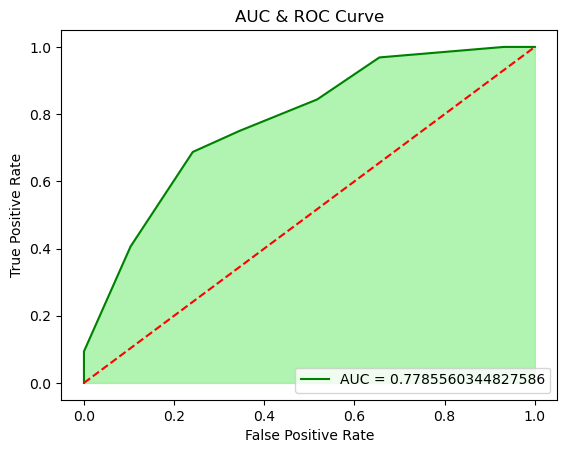

In [41]:
# 18. Đánh giá mô hình thông qua đồ thị AUC & ROC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

# Lấy xác suất tiên đoán của nhãn 1 (có bệnh)
y_pred_proba = knn_best.predict_proba(X_test)[:, 1]

# Tính toán giá trị False Positive Rate (FPR) và True Positive Rate (TPR)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

# Tính AUC
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Vẽ biểu đồ ROC
plt.plot(fpr, tpr, label="AUC = " + str(auc), color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')  # Đường chéo
plt.title("AUC & ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)

# Tô màu dưới đường ROC
plt.fill_between(fpr, tpr, color='lightgreen', alpha=0.7)

# Hiển thị biểu đồ
plt.show()


Accuracy: 0.7213
Confusion Matrix:
[[22  7]
 [10 22]]
[TN, FP, FN, TP]: [22, 7, 10, 22]
[TPR, FNR, FPR, TNR]: [0.6875, 0.3125, 0.2414, 0.7586]
[Precision, Recall, F1]: [0.7586, 0.6875, 0.7213]


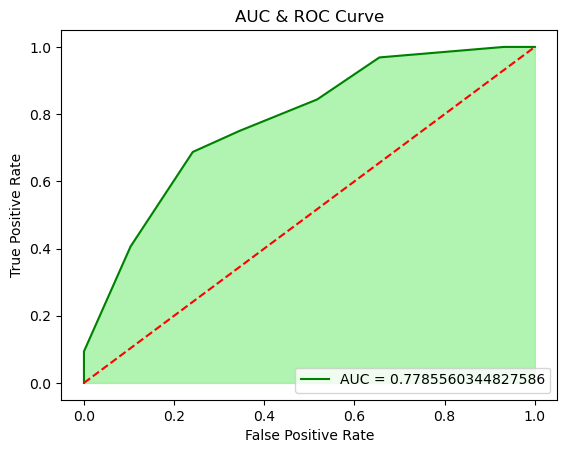

In [42]:
# 19. Hãy in ra màn hình accuracy, confusion matrix, [tn, fp, fn, tp], [TPR, FNR, FPR, TNR],
# [precision, recal, F1] và đồ thị AUC & ROC với ngưỡng xác xuất phân lớp là 0.65. Đưa ra 
# kết luận khi thiết lập threshold tăng hoặc threshold giảm sẽ tác động như thế nào đến kết quả đánh giá mô hình.


import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Ngưỡng xác suất phân lớp
threshold = 0.65

# Lấy xác suất tiên đoán của nhãn 1 (có bệnh)
y_pred_proba = knn_best.predict_proba(X_test)[:, 1]

# Áp dụng ngưỡng xác suất 0.65 để đưa ra dự đoán
y_pred_threshold = np.where(y_pred_proba >= threshold, 1, 0)

# Tính accuracy
accuracy = accuracy_score(y_test, y_pred_threshold)
print(f"Accuracy: {accuracy:.4f}")

# Tính confusion matrix
cm = confusion_matrix(y_test, y_pred_threshold)
print(f"Confusion Matrix:\n{cm}")

# Lấy giá trị [tn, fp, fn, tp]
tn, fp, fn, tp = cm.ravel()
print(f"[TN, FP, FN, TP]: [{tn}, {fp}, {fn}, {tp}]")

# Tính toán [TPR, FNR, FPR, TNR]
TPR = tp / (tp + fn)  # True Positive Rate (Recall)
FNR = fn / (tp + fn)  # False Negative Rate
FPR = fp / (fp + tn)  # False Positive Rate
TNR = tn / (tn + fp)  # True Negative Rate
print(f"[TPR, FNR, FPR, TNR]: [{TPR:.4f}, {FNR:.4f}, {FPR:.4f}, {TNR:.4f}]")

# Tính toán precision, recall, và F1-score
precision = precision_score(y_test, y_pred_threshold)
recall = recall_score(y_test, y_pred_threshold)
f1 = f1_score(y_test, y_pred_threshold)
print(f"[Precision, Recall, F1]: [{precision:.4f}, {recall:.4f}, {f1:.4f}]")

# Vẽ đồ thị AUC & ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label="AUC = " + str(auc), color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')  # Đường chéo
plt.title("AUC & ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.fill_between(fpr, tpr, color='lightgreen', alpha=0.7)
plt.show()


In [ ]:
#20. Viết chương trình dự báo bệnh tim dưới dạng Console Application, cho phép người dùng 
# nhập các đặc trưng đầu vào (feature input) và ngưỡng xác suất (threshold, nếu không nhập ngưỡng thì mặc định ngưỡng là 0.5). Sau đó, in ra kết quả chẩn đoán bệnh tim.



In [45]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

def get_float_input(prompt):
    while True:
        try:
            value = float(input(prompt))
            return value
        except ValueError:
            print("Giá trị nhập vào không hợp lệ, vui lòng nhập một số thực.")

def get_int_input(prompt, valid_range=None):
    while True:
        try:
            value = int(input(prompt))
            if valid_range and value not in valid_range:
                raise ValueError
            return value
        except ValueError:
            if valid_range:
                print(f"Giá trị nhập vào không hợp lệ, vui lòng nhập một số nguyên trong khoảng {valid_range}.")
            else:
                print("Giá trị nhập vào không hợp lệ, vui lòng nhập một số nguyên.")

def predict_heart_disease():
    # Nhập các đặc trưng đầu vào từ người dùng với kiểm tra lỗi
    print("Nhập các đặc trưng đầu vào cho bệnh nhân:")
    age = get_float_input("Age: ")
    sex = get_int_input("Sex (1 = Male, 0 = Female): ", valid_range=[0, 1])
    cp = get_int_input("Chest Pain Type (0-3): ", valid_range=[0, 1, 2, 3])
    trestbps = get_float_input("Resting Blood Pressure (trestbps): ")
    chol = get_float_input("Cholesterol (chol): ")
    fbs = get_int_input("Fasting Blood Sugar > 120 mg/dl (1 = True, 0 = False): ", valid_range=[0, 1])
    restecg = get_int_input("Resting Electrocardiographic Results (0-2): ", valid_range=[0, 1, 2])
    thalach = get_float_input("Maximum Heart Rate Achieved (thalach): ")
    exang = get_int_input("Exercise Induced Angina (1 = Yes, 0 = No): ", valid_range=[0, 1])
    oldpeak = get_float_input("ST Depression Induced by Exercise (oldpeak): ")
    slope = get_int_input("Slope of the Peak Exercise ST Segment (0-2): ", valid_range=[0, 1, 2])
    ca = get_int_input("Number of Major Vessels (0-3): ", valid_range=[0, 1, 2, 3])
    thal = get_int_input("Thal (1 = Normal, 2 = Fixed Defect, 3 = Reversible Defect): ", valid_range=[1, 2, 3])

    # Nhập ngưỡng xác suất nếu có, mặc định là 0.5
    threshold = input("Nhập ngưỡng xác suất (mặc định 0.5 nếu không nhập): ")
    if threshold:
        try:
            threshold = float(threshold)
        except ValueError:
            print("Ngưỡng không hợp lệ, sử dụng ngưỡng mặc định là 0.5.")
            threshold = 0.5
    else:
        threshold = 0.5

    # Đưa đặc trưng vào dưới dạng mảng numpy
    features = np.array([[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]])

    # Dự đoán xác suất bệnh tim
    y_pred_proba = knn_best.predict_proba(features)[:, 1]  # Lấy xác suất của nhãn 1 (có bệnh)

    # Dự đoán dựa trên ngưỡng xác suất
    y_pred = (y_pred_proba >= threshold).astype(int)

    # In ra kết quả chẩn đoán
    if y_pred[0] == 1:
        print(f"Bệnh nhân có nguy cơ mắc bệnh tim (với ngưỡng {threshold})")
    else:
        print(f"Bệnh nhân không có nguy cơ mắc bệnh tim (với ngưỡng {threshold})")

if __name__ == "__main__":
    predict_heart_disease()


Nhập các đặc trưng đầu vào cho bệnh nhân:
Giá trị nhập vào không hợp lệ, vui lòng nhập một số thực.
Giá trị nhập vào không hợp lệ, vui lòng nhập một số thực.
Giá trị nhập vào không hợp lệ, vui lòng nhập một số thực.
Giá trị nhập vào không hợp lệ, vui lòng nhập một số thực.
Giá trị nhập vào không hợp lệ, vui lòng nhập một số thực.
Giá trị nhập vào không hợp lệ, vui lòng nhập một số thực.
Giá trị nhập vào không hợp lệ, vui lòng nhập một số thực.
Giá trị nhập vào không hợp lệ, vui lòng nhập một số thực.
Giá trị nhập vào không hợp lệ, vui lòng nhập một số thực.
Giá trị nhập vào không hợp lệ, vui lòng nhập một số thực.
Giá trị nhập vào không hợp lệ, vui lòng nhập một số thực.
Giá trị nhập vào không hợp lệ, vui lòng nhập một số thực.
Giá trị nhập vào không hợp lệ, vui lòng nhập một số thực.
Giá trị nhập vào không hợp lệ, vui lòng nhập một số thực.
Giá trị nhập vào không hợp lệ, vui lòng nhập một số thực.
Giá trị nhập vào không hợp lệ, vui lòng nhập một số thực.
Giá trị nhập vào không hợp lệ,